In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import seaborn as sns
from sklearn.tree import export_graphviz
import graphviz

In [2]:
LS=pd.read_csv('Leases.csv')
MMO=pd.read_csv('Major Market Occupancy Data-revised.csv')
PA=pd.read_csv('Price and Availability Data.csv')
UE=pd.read_csv('Unemployment.csv')


In [3]:
avg_cost_per_quarter = LS.groupby(['year', 'quarter'])['overall_rent'].mean().reset_index()
avg_cost_per_quarter.rename(columns={'overall_rent': 'average_cost'}, inplace=True)

print(avg_cost_per_quarter)

    year quarter  average_cost
0   2018      Q1     36.200034
1   2018      Q2     36.631276
2   2018      Q3     36.993510
3   2018      Q4     37.437996
4   2019      Q1     36.911668
5   2019      Q2     38.634482
6   2019      Q3     38.774118
7   2019      Q4     39.538872
8   2020      Q1     40.293205
9   2020      Q2     37.508930
10  2020      Q3     36.557674
11  2020      Q4     37.473579
12  2021      Q1     37.648249
13  2021      Q2     38.386642
14  2021      Q3     39.719808
15  2021      Q4     40.673889
16  2022      Q1     40.361527
17  2022      Q2     41.274865
18  2022      Q3     40.418826
19  2022      Q4     41.173829
20  2023      Q1     41.475716
21  2023      Q2     41.524779
22  2023      Q3     41.465183
23  2023      Q4     42.336599
24  2024      Q1     42.842980
25  2024      Q2     43.099696
26  2024      Q3     43.098056
27  2024      Q4     43.778825


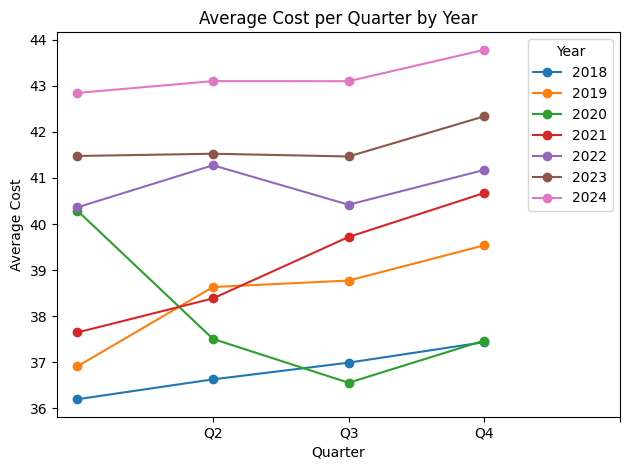

In [12]:
for year in avg_cost_per_quarter['year'].unique():
    data = avg_cost_per_quarter[avg_cost_per_quarter['year'] == year]
    plt.plot(data['quarter'], data['average_cost'], marker='o', label=f"{year}")

plt.title('Average Cost per Quarter by Year')
plt.xlabel('Quarter')
plt.ylabel('Average Cost')
plt.xticks([1, 2, 3, 4])  # Ensures x-axis shows all quarters
plt.legend(title='Year')
plt.tight_layout()
plt.show()


In [ ]:
data = data[['Variable1', 'Variable2', 'Variable3']]

In [13]:
avg_cost_per_month = LS.groupby(['year', 'monthsigned'])['overall_rent'].mean().reset_index()

# Optionally, rename the column for clarity
avg_cost_per_month.rename(columns={'overall_rent': 'average_cost'}, inplace=True)

print(avg_cost_per_month)

    year  monthsigned  average_cost
0   2018          1.0     36.818875
1   2018          2.0     35.639627
2   2018          3.0     36.426725
3   2018          4.0     36.087573
4   2018          5.0     37.199345
..   ...          ...           ...
79  2024          8.0     42.999214
80  2024          9.0     44.223485
81  2024         10.0     43.107286
82  2024         11.0     43.992980
83  2024         12.0     42.313854

[84 rows x 3 columns]


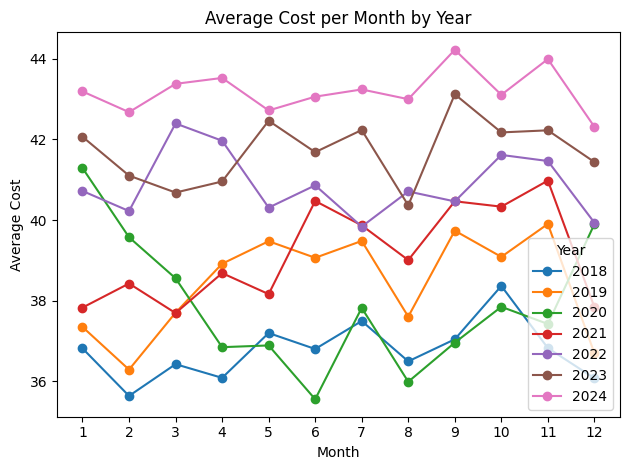

In [15]:
for year in avg_cost_per_month['year'].unique():
    data = avg_cost_per_month[avg_cost_per_month['year'] == year]
    plt.plot(data['monthsigned'], data['average_cost'], marker='o', label=f"{year}")

plt.title('Average Cost per Month by Year')
plt.xlabel('Month')
plt.ylabel('Average Cost')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])  # Ensures x-axis shows all quarters
plt.legend(title='Year')
plt.tight_layout()
plt.show()


Industry

In [4]:
IN=pd.read_csv('industry.csv')
IN = IN[IN['internal_class'] != 'Na']
IN = IN[IN['internal_industry'] != 'TBD']


In [96]:
print(sorted(IN['market'].unique()))

['Atlanta', 'Austin', 'Baltimore', 'Boston', 'Charlotte', 'Chicago', 'Chicago Suburbs', 'Dallas/Ft Worth', 'Denver', 'Detroit', 'Houston', 'Los Angeles', 'Manhattan', 'Nashville', 'Northern New Jersey', 'Northern Virginia', 'Orange County', 'Philadelphia', 'Phoenix', 'Raleigh/Durham', 'Salt Lake City', 'San Diego', 'San Francisco', 'Seattle', 'South Bay/San Jose', 'South Florida', 'Southern Maryland', 'Tampa', 'Washington D.C.']


In [5]:
IN['cbd_suburban'] = IN['cbd_suburban'].replace({'CBD': 1, 'Suburban': 0})
IN['internal_industry'] = IN['internal_industry'].replace({'Financial Services and Insurance':1,
       'Construction, Engineering and Architecture':2,
       'Technology, Advertising, Media, and Information':3,
       'Manufacturing (except Pharmaceutical, Retail, and Computer Tech)':4,
       'Associations and Non-profit Organizations (except Education and Non-profit Hospitals)':5,
       'Transportation':6, 'Coworking and Executive Suite Companies':7,
       'Business, Professional, and Consulting Services (except Financial and Legal) - Including Accounting':8,
       'Education':9, 'Legal Services':10,
       'Real Estate (except coworking providers)':11, 'Healthcare':12,
       'Personal Services and Recreation':13, 'Government':14, 'Retail':15,
       'Energy & Utilities':16, 'Pharmaceuticals':17,
       'Agriculture, Forestry, Fishing, Metal & Mineral Mining':18,
       'Unclassifiable':19})

IN['state'] = IN['state'].replace({'AZ':1, 'CA':2, 'CO':3, 'DC':4, 'DE':5, 'FL':6, 'GA':7, 
       'IL':8, 'MA':9, 'MD':10, 'MI':11, 'NC':12, 'NH':13, 'NJ':14, 'NY':15, 'PA':16, 'SC':17, 'TN':18, 
       'TX':19, 'UT':20, 'VA':21, 'WA':22})


/var/folders/xs/b3tzbf4n5z7fv8f5jndqz0k40000gn/T/ipykernel_55705/1130944664.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  IN['cbd_suburban'] = IN['cbd_suburban'].replace({'CBD': 1, 'Suburban': 0})
/var/folders/xs/b3tzbf4n5z7fv8f5jndqz0k40000gn/T/ipykernel_55705/1130944664.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  IN['internal_industry'] = IN['internal_industry'].replace({'Financial Services and Insurance':1,
/var/folders/xs/b3tzbf4n5z7fv8f5jndqz0k40000gn/T/ipykernel_55705/1130944664.py:16: FutureWarning: Downcastin

<Axes: xlabel='state', ylabel='count'>

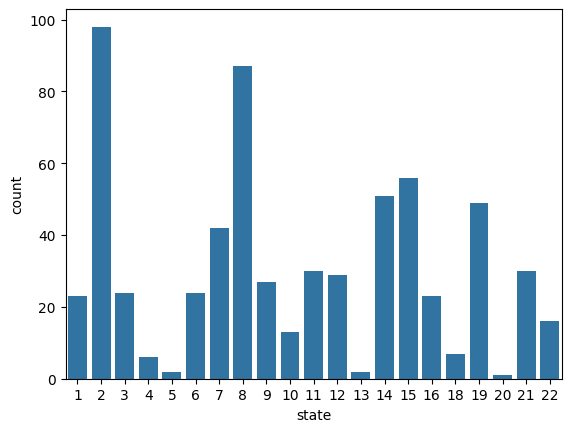

In [6]:
finance= IN[IN['internal_industry']==4]
sns.countplot(data=finance, x='state')

<Axes: xlabel='market', ylabel='count'>

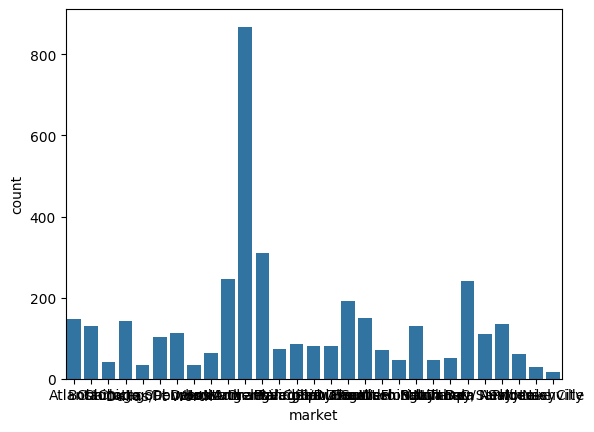

In [95]:
finance= IN[IN['internal_industry']==3]
sns.countplot(data=finance, x='market')

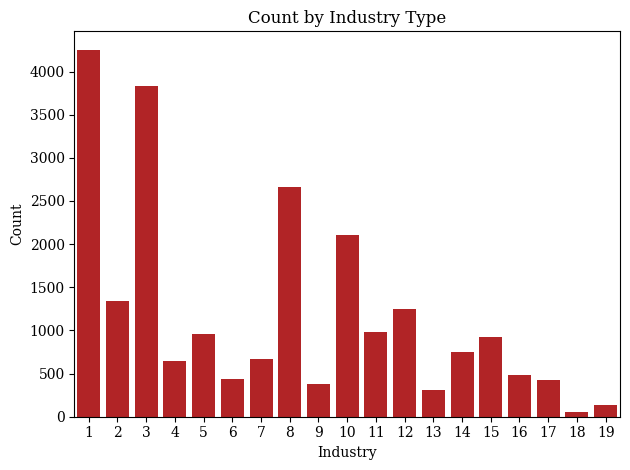

In [139]:
plt.rcParams['font.family'] = 'serif'

# Create the countplot with a custom color (e.g., 'darkred')
ax = sns.countplot(x='internal_industry', data=IN, color='#c80d0f')
# Optional: Rotate x-axis labels for readability if there are many categories
plt.title('Count by Industry Type')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

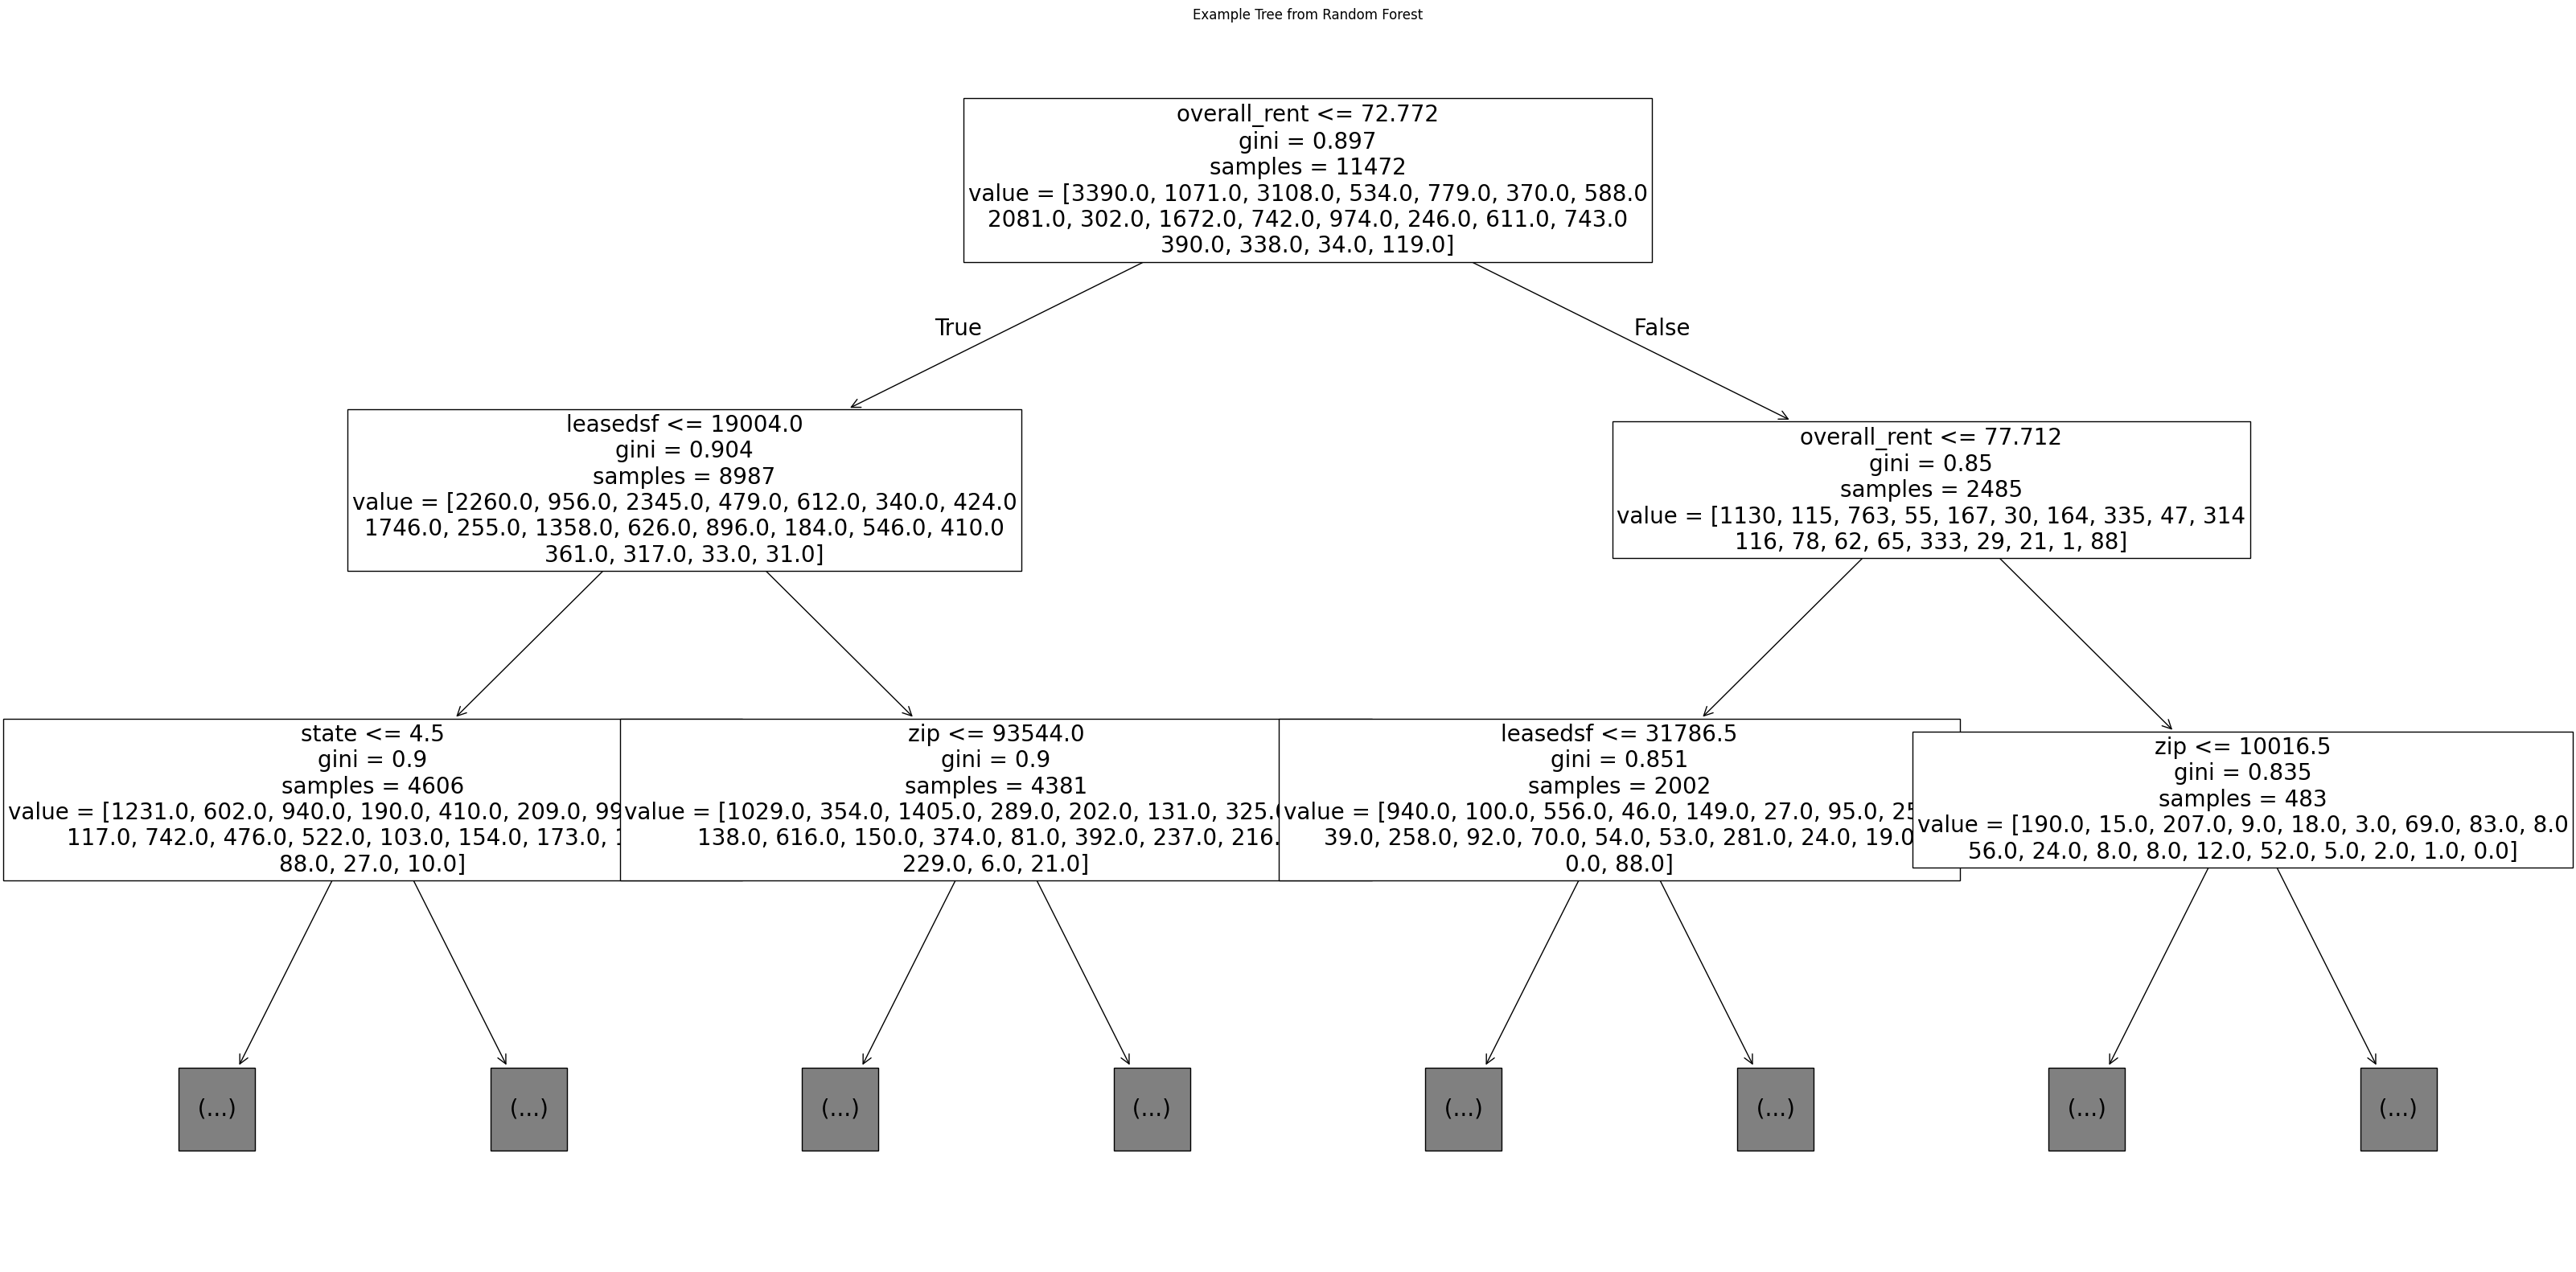

In [8]:
X = IN[['zip', 'leasedsf', 'overall_rent', 'cbd_suburban', 'state']]

y = IN['internal_industry']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- STEP 5: Train Random Forest Model ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- STEP 6: Evaluate the Model ---
y_pred = model.predict(X_test)
plt.figure(figsize=(40, 20))
plot_tree(model.estimators_[0], feature_names=X.columns, max_depth=2, fontsize=20)
plt.title("Example Tree from Random Forest")
plt.show()

In [35]:
single_tree = model.estimators_[0]
Names = ['Zip Code', 'Square Feet', 'Overall Rent', 'CBD/Suburban', 'State']


# Export tree to Graphviz format with nice visuals
dot_data = export_graphviz(
    single_tree,
    feature_names=Names,
    class_names=[str(cls) for cls in model.classes_],  # convert class labels to strings
    rounded=True,
    impurity=False,
    max_depth=2
)

# Render with Graphviz

graph = graphviz.Source(dot_data)

graph
graph.render(filename='random_forest_tree', format='png', cleanup=True)


'random_forest_tree.png'

In [37]:
importances = model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Show the top 2 features
print("Accuracy:", accuracy_score(y_test, y_pred))
print(feature_importance_df.head(2))

Accuracy: 0.2272827769179748
    Feature  Importance
1  leasedsf    0.499513
0       zip    0.247899


Industry Binary: Finance

In [126]:
IN['is_finance'] = IN['internal_industry'].apply(lambda x: 1 if x == 1 else 0)

In [127]:
X = IN[['zip', 'leasedsf', 'overall_rent', 'cbd_suburban', 'state']]

y = IN['is_finance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- STEP 5: Train Random Forest Model ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- STEP 6: Evaluate the Model ---
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7988061021445942


In [128]:
importances = model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Show the top 2 features
print("Accuracy:", accuracy_score(y_test, y_pred))
print(feature_importance_df)

Accuracy: 0.7988061021445942
        Feature  Importance
1      leasedsf    0.513450
0           zip    0.243142
2  overall_rent    0.212061
4         state    0.020501
3  cbd_suburban    0.010846


Industry Binary: Tech

In [129]:
IN['is_tech'] = IN['internal_industry'].apply(lambda x: 1 if x == 3 else 0)
X = IN[['zip', 'leasedsf', 'overall_rent', 'cbd_suburban', 'state']]

y = IN['is_tech']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- STEP 5: Train Random Forest Model ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- STEP 6: Evaluate the Model ---
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8211364138845899


In [130]:
importances = model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Show the top 2 features
print("Accuracy:", accuracy_score(y_test, y_pred))
print(feature_importance_df)

Accuracy: 0.8211364138845899
        Feature  Importance
1      leasedsf    0.517507
0           zip    0.253756
2  overall_rent    0.196004
4         state    0.020155
3  cbd_suburban    0.012578


Industry Binary: Business

In [131]:
IN['is_business'] = IN['internal_industry'].apply(lambda x: 1 if x == 8 else 0)
X = IN[['zip', 'leasedsf', 'overall_rent', 'cbd_suburban', 'state']]

y = IN['is_business']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- STEP 5: Train Random Forest Model ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- STEP 6: Evaluate the Model ---
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8598275480875525


In [133]:
importances = model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Show the top 2 features
print("Accuracy:", accuracy_score(y_test, y_pred))
print(feature_importance_df)

Accuracy: 0.8598275480875525
        Feature  Importance
1      leasedsf    0.537247
0           zip    0.235313
2  overall_rent    0.188288
4         state    0.027921
3  cbd_suburban    0.011231


Industry Binary: Legal

In [134]:
IN['is_legal'] = IN['internal_industry'].apply(lambda x: 1 if x == 10 else 0)
X = IN[['cbd_suburban', 'leasedsf', 'overall_rent', 'state', 'zip']]

y = IN['is_legal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- STEP 5: Train Random Forest Model ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- STEP 6: Evaluate the Model ---
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8887906256909132


In [135]:
importances = model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Show the top 2 features
print("Accuracy:", accuracy_score(y_test, y_pred))
print(feature_importance_df)

Accuracy: 0.8887906256909132
        Feature  Importance
1      leasedsf    0.569718
4           zip    0.200238
2  overall_rent    0.189528
0  cbd_suburban    0.020853
3         state    0.019663


Average Heatmap

<Axes: >

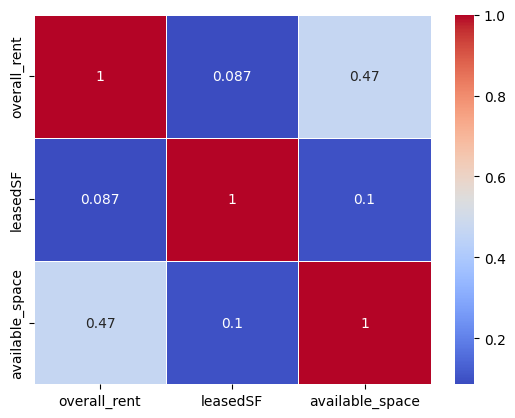

In [31]:
sns.heatmap(LS[['overall_rent',
       'leasedSF', 'available_space']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)

Ask about if rent is by square foot?

Look at variable: 'internal_industry' in dataset 'leases' and use that to analyze what type of office space each industry prefers
Look at cost per quarter in each year to see if theres a quarter where cost is lower and people should rent/buy
Identify if there are any up and coming areas

To inform Savills of natable trends in the commercial real estate market that could be use to advise clients on where, when, whether and how to locate their offices

Graph overall_rent per quarter per year depending on area to see if there is a specific quater that rent gets cheaper, or look at